# testing rock physics models added to bruges

From this pull request: <https://github.com/agile-geoscience/bruges/pull/79>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

%cd ../bruges
import bruges as b
%cd ../geophysical_notes

C:\Users\ag19324\GoogleDrive\PYTHON\_GITHUB\bruges
C:\Users\ag19324\GoogleDrive\PYTHON\_GITHUB\geophysical_notes


### soft sand model

In [3]:
K0,G0,D0 = 36.6,45,2.65
sigma=20
phic = 0.36
phi = 0.3

# .........................................................
# rock physics handbook, example page 260
Khm,Ghm=b.rockphysics.rpmodels.hertzmindlin(K0, G0, sigma, phic, Cn=9, f=1)
Kd,Gd=b.rockphysics.rpmodels.softsand(K0, G0, phi, sigma, phic, Cn=9, f=1)

print('Hertz-Mindlin pure quartz at effective pressure={}, phi_c={:.2f}: K={:.2f}, G={:.2f}'.format(sigma,phic,Khm,Ghm))
print('Soft sand model at porosity={:.2f}: K={:.2f}, G={:.2f}'.format(phi,Kd,Gd))

Hertz-Mindlin pure quartz at effective pressure=20, phi_c=0.36: K=2.05, G=3.02
Soft sand model at porosity=0.30: K=3.05, G=3.99


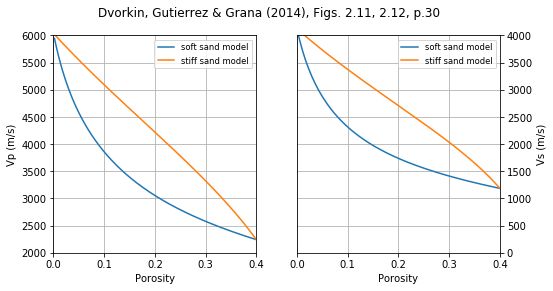

In [19]:
# .........................................................
# soft and stiff sand models
# Dvorkin, Gut, Grana, pag 29
K0,G0,D0 = 36.6,45,2.65
Kf,Df=2.1,1
sigma=30
phic = 0.4
phi = 0.3
n = 7

phi = np.linspace(0,0.4,200)

Kd,Gd=b.rockphysics.rpmodels.softsand(K0, G0, phi, sigma, phic, Cn=n)
vp_soft,vs_soft,_,_= b.rockphysics.rpmodels.vels(Kd,Gd,K0,D0,Kf,Df,phi)

Kd,Gd=b.rockphysics.rpmodels.stiffsand(K0, G0, phi, sigma, phic, Cn=n)
vp_stiff,vs_stiff,_,_= b.rockphysics.rpmodels.vels(Kd,Gd,K0,D0,Kf,Df,phi)


f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(phi,vp_soft, label='soft sand model')
ax[0].plot(phi,vp_stiff, label='stiff sand model')
ax[0].set_ylim(2e3,6e3)
ax[0].set_ylabel('Vp (m/s)')
ax[1].plot(phi,vs_soft, label='soft sand model')
ax[1].plot(phi,vs_stiff, label='stiff sand model')
ax[1].set_ylim(0,4e3)
ax[1].set_ylabel('Vs (m/s)')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
for aa in ax:
    aa.set_xlim(0,0.4)
    aa.legend(fontsize='small')
    aa.grid()
    aa.set_xlabel('Porosity')
f.suptitle('Dvorkin, Gutierrez & Grana (2014), Figs. 2.11, 2.12, p.30');

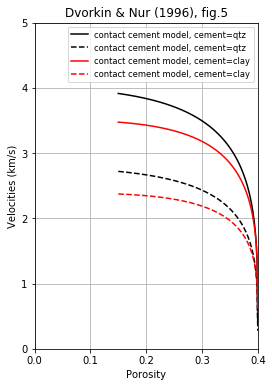

In [23]:

# .........................................................
# contact cement model
# articolo Dvorkin Nur 1996
K0,G0,D0 = 38,44,2.65
phi = np.linspace(0.15,0.4,200)

rho = D0*(1-phi)
Kc, Gc = 36.6, 45 # quartz cement
Kd,Gd=b.rockphysics.rpmodels.contactcement(K0, G0, phi, Kc=Kc, Gc=Gc)
vp_cc_qtz = np.sqrt((Kd+4/3*Gd)/rho)
vs_cc_qtz = np.sqrt(Gd/rho)

Kc, Gc = 21, 7 # clay cement
Kd,Gd=b.rockphysics.rpmodels.contactcement(K0, G0, phi, Kc=Kc, Gc=Gc)
vp_cc_cl = np.sqrt((Kd+4/3*Gd)/rho)
vs_cc_cl = np.sqrt(Gd/rho)


f,ax=plt.subplots(figsize=(4,6))
ax.plot(phi,vp_cc_qtz, 'k-', label='contact cement model, cement=qtz')
ax.plot(phi,vs_cc_qtz, 'k--', label='contact cement model, cement=qtz')
ax.plot(phi,vp_cc_cl, 'r-', label='contact cement model, cement=clay')
ax.plot(phi,vs_cc_cl, 'r--', label='contact cement model, cement=clay')
ax.set_xlim(0,0.4)
ax.set_ylim(0,5)
ax.set_xlabel('Porosity')
ax.set_ylabel('Velocities (km/s)')
ax.legend(fontsize='small')
ax.grid()
ax.set_title('Dvorkin & Nur (1996), fig.5');

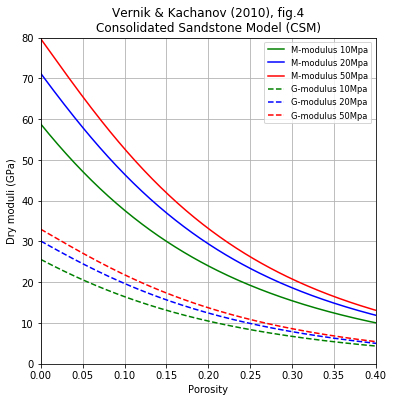

In [25]:

# .........................................................
# test consolidated sand model
# vernik & kachanov fig 4
# plot 100% accurate!
K0,G0 = 35.7,33
phi = np.linspace(0,.5,200)

Kd_10, Gd_10 = b.rockphysics.rpmodels.vernik_csm(K0,G0,phi,sigma=10)
Kd_20, Gd_20 = b.rockphysics.rpmodels.vernik_csm(K0,G0,phi,sigma=20)
Kd_50, Gd_50 = b.rockphysics.rpmodels.vernik_csm(K0,G0,phi,sigma=50)

f,ax=plt.subplots(figsize=(6,6))
ax.plot(phi,Kd_10+4/3*Gd_10,'-g', label='M-modulus 10Mpa')
ax.plot(phi,Kd_20+4/3*Gd_20,'-b', label='M-modulus 20Mpa')
ax.plot(phi,Kd_50+4/3*Gd_50,'-r', label='M-modulus 50Mpa')
ax.plot(phi,Gd_10,'--g', label='G-modulus 10Mpa')
ax.plot(phi,Gd_20,'--b', label='G-modulus 20Mpa')
ax.plot(phi,Gd_50,'--r', label='G-modulus 50Mpa')
ax.set_xlim(0,0.4)
ax.set_ylim(0,80)
ax.set_xlabel('Porosity')
ax.set_ylabel('Dry moduli (GPa)')
ax.legend(fontsize='small')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.4\nConsolidated Sandstone Model (CSM)');

Text(0.5, 1.0, 'Vernik & Kachanov (2010), fig.5\nSand Diagenesis Model (SDM)')

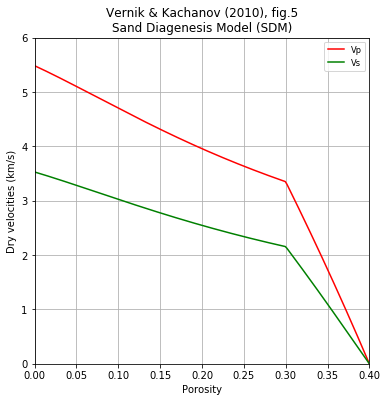

In [26]:

# .........................................................
# test sandstone diagenesis model
# vernik & kachanov fig 5
K0,G0,D0 = 35.7,33,2.65
phi = np.linspace(0,.4,200)


rho = D0*(1-phi)
Kd, Gd = b.rockphysics.rpmodels.vernik_sdm(K0,G0,phi,sigma=50,phi_c=0.4,phi_con=0.3)
vp = np.sqrt((Kd + 4/3*Gd)/rho)
vs = np.sqrt(Gd/rho)

f,ax=plt.subplots(figsize=(6,6))
ax.plot(phi,vp,'-r', label='Vp')
ax.plot(phi,vs,'-g', label='Vs')
ax.set_xlim(0,0.4)
ax.set_ylim(0,6)
ax.set_xlabel('Porosity')
ax.set_ylabel('Dry velocities (km/s)')
ax.legend(fontsize='small')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.5\nSand Diagenesis Model (SDM)')


C:\Users\ag19324\GoogleDrive\PYTHON\_GITHUB\bruges\bruges\rockphysics\rpmodels.py:559: RuntimeWarning: invalid value encountered in sqrt
  vs = np.sqrt(A*vp**4 + B*vp**2 - C)


Text(0.5, 1.0, 'Vernik & Kachanov (2010), fig.11\nShale Model (thick=Vp, thin=Vs')

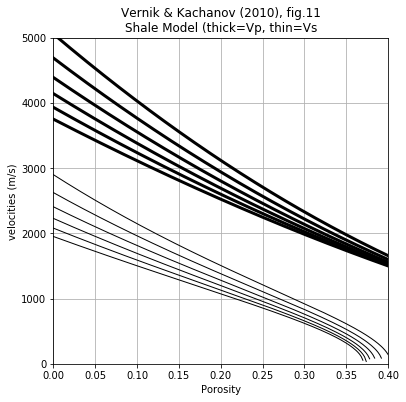

In [27]:

# .........................................................
# test shale model
vv = np.linspace(0.2,0.8,6)
phi = np.linspace(0,0.4,200)

f,ax=plt.subplots(figsize=(6,6))
for i in vv:
    vp, vs, rho = b.rockphysics.rpmodels.vernik_shale(i, phi)
    ax.plot(phi,vp,'-k', lw=3)
    ax.plot(phi,vs,'-k', lw=1)
ax.set_xlim(0,0.4)
ax.set_ylim(0,5e3)
ax.set_xlabel('Porosity')
ax.set_ylabel('velocities (m/s)')
ax.grid()
ax.set_title('Vernik & Kachanov (2010), fig.11\nShale Model (thick=Vp, thin=Vs')

Text(0.5, 1.0, 'Vernik 2016 [fig. 19]')

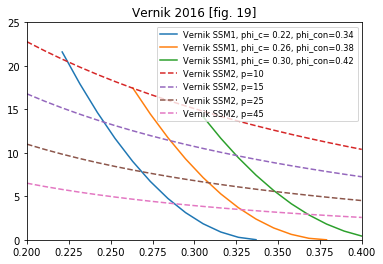

In [28]:


# .........................................................
# test unconsolidated sand models (soft sand 1 and 2)
# figure from book, pag 64
phi= np.linspace(.2,.4,20)
pors=[.22,.26,.30]
poreshape=[10,15,25,45]

plt.figure()
for nn in pors:
    Kd, Gd = b.rockphysics.rpmodels.vernik_ssm1(K0,G0,phi,sigma=10,phi_c=nn+.12,phi_con=nn)
    Md_ssm1 = Kd+4/3*Gd
    plt.plot(phi,Md_ssm1,'-',label=r'Vernik SSM1, phi_c= {:.2f}, phi_con={:.2f}'.format(nn,nn+.12))
for mm in poreshape:
    Kd, Gd = b.rockphysics.rpmodels.vernik_ssm2(K0,G0,phi,p=mm,q=mm)
    Md_ssm2 = Kd+4/3*Gd
    plt.plot(phi,Md_ssm2,'--',label=r'Vernik SSM2, p={:.0f}'.format(mm))
plt.xlim(0.2,0.4)
plt.ylim(0,25)
plt.legend(fontsize='small')
plt.title('Vernik 2016 [fig. 19]')


## create synthetic logs

In [29]:
#--- elastic moduli for minerals and fluids
Dsh, Ksh, Gsh    = 2.4, 15, 5
Dqz, Kqz, Gqz    = 2.6, 37, 44
Dcar, Kcar, Gcar = 2.7, 76, 32
Dcar, Kcar, Gcar = 2.2, 20, 10
Db, Kb = 1.1, 2.2
Do, Ko = 0.8, 1.5
Dg, Kg = 0.2, 0.06
hc='gas'
if hc=='oil':
    Dhc, Khc = Do, Ko
else:
    Dhc, Khc = Dg, Kg

In [30]:
#--- creates dummy depth scale and empty petrophysical logs
ns=100
top,base=30,50
z=np.arange(ns)
phi,vsh,vqz,vcar= (np.zeros(ns) for _ in range(4))
sw = np.ones(ns)

#--- cuts out a reservoir section between top and base
#--- and assigns higher porosity and lower Sw
res=(z>=top) & (z<base)
phi[res]=0.3
sw[res]=0.2

#--- adds random variations to Phi and Sw
phi[~res] += np.random.rand(ns-np.count_nonzero(res))*.01
phi[res] += np.random.rand(np.count_nonzero(res))*.1
sw[res] -= np.random.rand(np.count_nonzero(res))*.05

#--- fills in mineralogical fraction volumes
vcar=np.random.randn(ns)*.1+.2
# vcar[res]=np.random.randn(np.count_nonzero(res))*.3+.2
vcar[vcar<0]=0
vqz=0.1*(1-phi-vcar)
vsh=0.9*(1-phi-vcar)
vqz[res] =0.8*(1-phi[res]-vcar[res])
vsh[res] =0.2*(1-phi[res]-vcar[res])

In [ ]:
#--- normalize mineral volumes
vshN = vsh/(1-phi)
vqzN = vqz/(1-phi)
vcarN = vcar/(1-phi)
#--- computes rock matrix elastic moduli
_,_,_,_,K0,G0 = squit.rp.vrh([vshN,vqzN,vcarN],[Ksh,Kqz,Kcar],[Gsh,Gqz,Gcar])
D0 = vshN*Dsh+vqzN*Dqz+vcarN*Dcar
#--- computes total fluid elastic moduli
_,Kf,_,_,_,_= squit.rp.vrh([sw,1-sw],[Kb,Khc],[0,0])
Df = sw*Db+(1-sw)*Dhc

In [ ]:
#--- use rpm to create velocities and density logs
# Kdry, Gdry = squit.rp.softsand(K0, G0, phi, sigma=20)
Kdry, Gdry = squit.rp.stiffsand(K0, G0, phi, sigma=20)
vp,vs,rho,_= squit.rp.vels(Kdry,Gdry,K0,D0,Kf,Df,phi)

#--- assemble everything into a Pandas DataFrame
temp={'VQZ':vqz,'VCAR':vcar,'VSH':vsh,'PHIE':phi,'SWE':sw,'VP':vp,'VS':vs,'RHO':rho}
ww = pd.DataFrame(data=temp, index=z)
ww.index.rename('DEPTH', inplace=True)

ww[['VQZ','VCAR','VSH','PHIE','SWE']].plot(subplots=True)
squit.plot.quicklook(ww)

In [ ]:
###############################################

tmp={
    'shale': [Dsh, Ksh, Gsh],
    'brine': [Db,  Kb,  0],
    'oil':   [Do,  Ko,  0],
    'gas':   [Dg,  Kg,  0]}

par=pd.DataFrame(tmp, index=['D','K','G'])
par.columns=par.columns.str.upper()
par.columns = map(str.upper, par.columns)

# add other minerals
par['VSH']=[Dsh, Ksh, Gsh]
par['VQZ']=[Dqz, Kqz, Gqz]
par['VCAR']=[Dcar, Kcar, Gcar]


wwf0=squit.rp.frm(ww,par,insitu='gas',minerals=False)
# tmpf=squit.rp.frmclean(tmp,cutoff_ss=0.35,cutoff_phi=0.1,stats=True)
squit.plot.frmqc(wwf0)


wwf1=squit.rp.frm(ww,par,insitu='gas',minerals=True)
# tmpf=squit.rp.frmclean(tmp,cutoff_ss=0.35,cutoff_phi=0.1,stats=True)
squit.plot.frmqc(wwf1)